# Functions

In [22]:
# %load_ext autoreload
# %reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
def overview_plot(df, plot_dict, suptitle, time_range=None, figsize=(12, 20)):
    """
    Generates an overview plot with multiple subplots based on the provided data and plot configuration.
    Parameters:
    df (pandas.DataFrame): The data frame containing the data to be plotted. It must include a 'time_seconds' column.
    plot_dict (dict): A dictionary where keys are subplot titles and values are lists of column names to be plotted in each subplot.
    suptitle (str): The main title for the entire figure.
    time_range (tuple, optional): A tuple specifying the start and end time in seconds to filter the data. Defaults to None.
    figsize (tuple, optional): A tuple specifying the size of the figure. Defaults to (12, 20).
    Returns:
    None
    """

    # Set the font to Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(len(plot_dict), 1, figsize=figsize, sharex=True)
    
    if len(plot_dict) == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one subplot

    # Add a suptitle to the figure
    fig.suptitle(suptitle, fontsize=16)

    # Apply time range if specified
    if time_range:
        df = df[(df['time_seconds'] >= time_range[0]) & (df['time_seconds'] <= time_range[1])]

    for ax, (title, columns) in zip(axes, plot_dict.items()):
        for column in columns:
            ax.scatter(df['time_seconds'], df[column], label=column.replace('_', ' '), marker='.')

        # Set the title of the subplot
        ax.set_title(title)

        # Add y-axis units based on specific strings in the title
        if 'Torque' in title:
            ax.set_ylabel('[Nm]')
        elif 'Force' in title:
            ax.set_ylabel('[N]')
        elif 'Velocity' in title:
            ax.set_ylabel('[m/s]' if 'Track' in title else '[rad/s]')
        elif 'angle' in title:
            ax.set_ylabel('[rad]')
        else:
            ax.set_ylabel('')
        
        if 'Track Velocity' in title:
            ax.set_ylim(-32, 2)
        # if 'Tail Torque' in title:
        #     ax.set_ylim(-200, 200)
        # if 'Torques on Body' in title:
        #     ax.set_ylim(-2, 2)

        # Add legend to the subplot
        ax.legend()
        ax.grid()

    # Set the x-axis label
    axes[-1].set_xlabel('Time [s]')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
    plt.show()

from matplotlib.ticker import ScalarFormatter

def plot_Drag_contribution(df_wForce, df_woForce, columns_to_plot, legend, suptitle, columns_to_plot2=None, time_range=None, additional_functions : dict = {}, figsize=(12, 18)):
    """
    This function creates a figure with multiple subplots.
    
    Pseudocode:
    - check if 'columns_to_plot2' is provided;
        - if yes: check that keys of 'columns_to_plot' and 'columns_to_plot2' are the same (assertion error)
        - if no: copy 'columns_to_plot' to 'columns_to_plot2'
    
    For each key in 'columns_to_plot' create a subplot which plots;
    - columns defined in 'columns_to_plot' for 'df_wForce'
    - columns defined in 'columns_to_plot2' for 'df_woForce'

    Labels:
    - For plots from 'df_wForce': use the list of labels found at 'legend[key]' where 'key' is the key in 'columns_to_plot'. Be sure to append ' (with Wind)'.
    - For plots from 'df_woForce': use the list of labels found at 'legend[key]' where 'key' is the key in 'columns_to_plot2'. Be sure to append ' (without Wind)'.
    
    Args:
    - df_wForce (pd.DataFrame): dataframe with forces applied (requires column 'time_seconds')
    - df_woForce (pd.DataFrame): dataframe with forces not applied (requires column 'time_seconds')
    - columns_to_plot (dict): contains as keys the subplot-titles and as values a list of columns to plot
    - columns_to_plot2 (dict): defaults to '{}'. If provided, the 'columns_to_plot' only applies to 'df_wForce' and 'columns_to_plot2' to 'df_woForce'
    - legend (dict): contains same keys as the 'columns_to_plot', values is a list of labels to use
    - suptitle (str): main title for the entire figure
    - time_range: tuple with start and end time, if empty, the entire simulation time is used
    - additional_functions (dict): contains the subplot titles as keys and functions which add additional lines to the subplot
    - figsize: tuple with figure size
    """
    
    # Set the font to Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    # Increase font size
    plt.rcParams.update({'font.size': 14})
    
    # Check if 'columns_to_plot2' is provided
    if columns_to_plot2:
        assert columns_to_plot.keys() == columns_to_plot2.keys(), "Keys of 'columns_to_plot' and 'columns_to_plot2' must be the same"
    else:
        columns_to_plot2 = columns_to_plot.copy()
    
    # Apply time range if specified
    if time_range:
        df_wForce = df_wForce[(df_wForce['time_seconds'] >= time_range[0]) & (df_wForce['time_seconds'] <= time_range[1])]
        df_woForce = df_woForce[(df_woForce['time_seconds'] >= time_range[0]) & (df_woForce['time_seconds'] <= time_range[1])]

    # Create a figure and a set of subplots
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=figsize, sharex=True)
    
    if len(columns_to_plot) == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one subplot

    # Add a suptitle to the figure
    fig.suptitle(suptitle, fontsize=22)

    for ax, (title, columns) in zip(axes, columns_to_plot.items()):
        # Plot columns from df_wForce
        for column, label in zip(columns, legend[title]):
            ax.scatter(df_wForce['time_seconds'], df_wForce[column], label=f"{label} (with Wind)", marker='o', s=5, color='orange')

        # Plot columns from df_woForce
        for column, label in zip(columns_to_plot2[title], legend[title]):
            ax.scatter(df_woForce['time_seconds'], df_woForce[column], label=f"{label} (without Wind)", marker='o', s=5, alpha=0.7, color='forestgreen')
        
        if title in additional_functions.keys():
            try:
                arguments = additional_functions[title + "_args"]
            except:
                arguments = {}
            additional_functions[title](ax, df_wForce, df_woForce, **arguments)
        
        # Set the title of the subplot
        ax.set_title(title)

        # Set y-axis formatter to ScalarFormatter to avoid scientific notation
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

        # Add legend to the subplot
        ax.legend()
        ax.grid()

    # Set the x-axis label
    axes[-1].set_xlabel('Time [s]')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
    plt.show()


def add_difference_and_percentage_line_to_plot(ax: plt.axes, df_wForce: pd.DataFrame, df_woForce: pd.DataFrame, column: str):
    """
    This function adds a scatter plot to the provided ax with another y-axis on the right-hand side.
    The 'ax' provided already has lines plotted, which is why we need to add another y-axis on the right-hand side.
    
    Args:
    - ax (plt.Axes): The existing axis with lines plotted.
    - df_wForce (pd.DataFrame): DataFrame with forces applied (requires column 'time_seconds').
    - df_woForce (pd.DataFrame): DataFrame without forces applied (requires column 'time_seconds').
    - column (str): The name of the column for which to calculate the difference and percentage.
    
    This function adds:
    - A scatter plot for the difference between df_wForce[column] and df_woForce[column].
    - A scatter plot for the percentage difference between df_wForce[column] and df_woForce[column].
    """

    df = pd.DataFrame(index=df_wForce.index, data={'time_seconds': df_wForce['time_seconds'],
                            'with_Wind': df_wForce[column[0]], 'without_Wind': df_woForce[column[0]]})
    df['difference'] = df['with_Wind'] - df['without_Wind']
    # Calculate the percentage difference, where df['with_Wind'].abs() and df['without_Wind'].abs() are larger than 2
    index = (df['without_Wind'].abs() > 2)
    df.loc[index, 'percentage'] = 100 * (df.loc[index, 'difference'] / df.loc[index, 'without_Wind'])
    
    # Compute the difference between the two columns
    difference = df_wForce[column] - df_woForce[column]
    
    # Avoid division by zero by replacing zeros in df_woForce[column] with a small value (or NaN)
    df_woForce[column].replace(0, float('nan'), inplace=True)
    
    # Compute the percentage difference but limit entries between -200% and 200%
    percentage = 100 * (difference / df_woForce[column])

    # Create a secondary y-axis on the right side
    ax_right = ax.twinx()

    # Plot the difference on the original ax as a scatter plot
    ax.scatter(df_wForce['time_seconds'], difference, label=f'Difference', color='blue', marker='o', s=5)

    # Plot the percentage on the secondary y-axis
    # ax_right.scatter(df_wForce['time_seconds'], percentage, label=f'Percentage', color='red', marker='o', s=5)
    ax_right.scatter(df['time_seconds'], df['percentage'], label=f'Percentage', color='red', marker='o', s=5)

    # Set labels and legends
    ax_right.set_ylabel('Percentage Difference [%]')
    # ax_right.set_ylim(-1000, 1000)
    ax_right.legend(loc='lower right')

    # Combine legends from both axes
    handles, labels = ax.get_legend_handles_labels()
    handles_right, labels_right = ax_right.get_legend_handles_labels()
    ax.legend(handles + handles_right, labels + labels_right, loc='upper right')

    # # Grid lines
    ax_right.grid(False)  # Avoid having grid on both axes to keep the plot clean

In [25]:
def compute_metrics(data_dict, metrics_dict):
    # Get the column names (keys) from the data_dict
    columns = list(data_dict.keys())
    
    # Initialize an empty dictionary to store results for each metric
    result_dict = {metric: pd.DataFrame(index=columns, columns=columns) for metric in metrics_dict.keys()}
    
    # Iterate over each pair of columns in data_dict
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i != j:  # Skip comparison of the same column
                # Apply each metric to the pair of columns
                for metric, metric_func in metrics_dict.items():
                    result_dict[metric].loc[col1, col2] = metric_func(data_dict[col1] - data_dict[col2])
    
    # Output the tables for each metric
    for metric, table in result_dict.items():
        print(f"\nMetric: {metric}")
        print(table)
    
    return result_dict

import seaborn as sns
def plot_metrics_heatmap(result_dict, figure_size=5, save_path=None, save_format=None, multiple_figs=False):
    if multiple_figs: # Make and save plot for each metric individually
        i = 0
        for metric, table in result_dict.items():
            new_path = save_path.split('.')[0] + f'_{i}' + '.' + save_path.split('.')[1]
            plot_metrics_heatmap({metric: table}, figure_size, save_path=new_path, save_format=save_format, multiple_figs=False)
            i += 1
        return

    # Set global font to Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12  # Default font size for labels
    
    # Number of subplots = number of metrics
    num_metrics = len(result_dict)
    
    # Create a figure and subplots
    fig, axes = plt.subplots(num_metrics, 1, figsize=(figure_size, figure_size * num_metrics))  # Adjust size as needed
    
    # Ensure axes is iterable if there's only one metric
    if num_metrics == 1:
        axes = [axes]
    
    # Loop through metrics and plot heatmaps
    for ax, (metric, table) in zip(axes, result_dict.items()):
        sns.heatmap(table.astype(float), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax)
        ax.set_title(metric, fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        # Add units to the colorbar
        cbar = ax.collections[0].colorbar
        cbar.set_label('[rad/s]', rotation=90, labelpad=15)
    
    # Add a suptitle for the entire figure
    # plt.suptitle('Metric Heatmaps', fontsize=16)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    if save_path and save_format:
        if save_format == 'pdf':
            # height = figure_size * num_metrics
            # width = figure_size
            # fig.set_size_inches( width / 2.54, height / 2.54)
            plt.savefig(save_path, format=save_format, bbox_inches='tight')
        plt.savefig(save_path, format=save_format)

    # Show the plot
    plt.show()


# Example usage
data = {
    "Column A": pd.Series([1, 2, 3]),
    "Column B": pd.Series([4, 5, 6]),
    "Column C": pd.Series([7, 8, 9])
}

metrics = {
    "Absolute Maximum Difference": lambda x: x.abs().max(),
    "Sum of Differences": lambda x: x.sum()
}

# Debug

## FF Approach

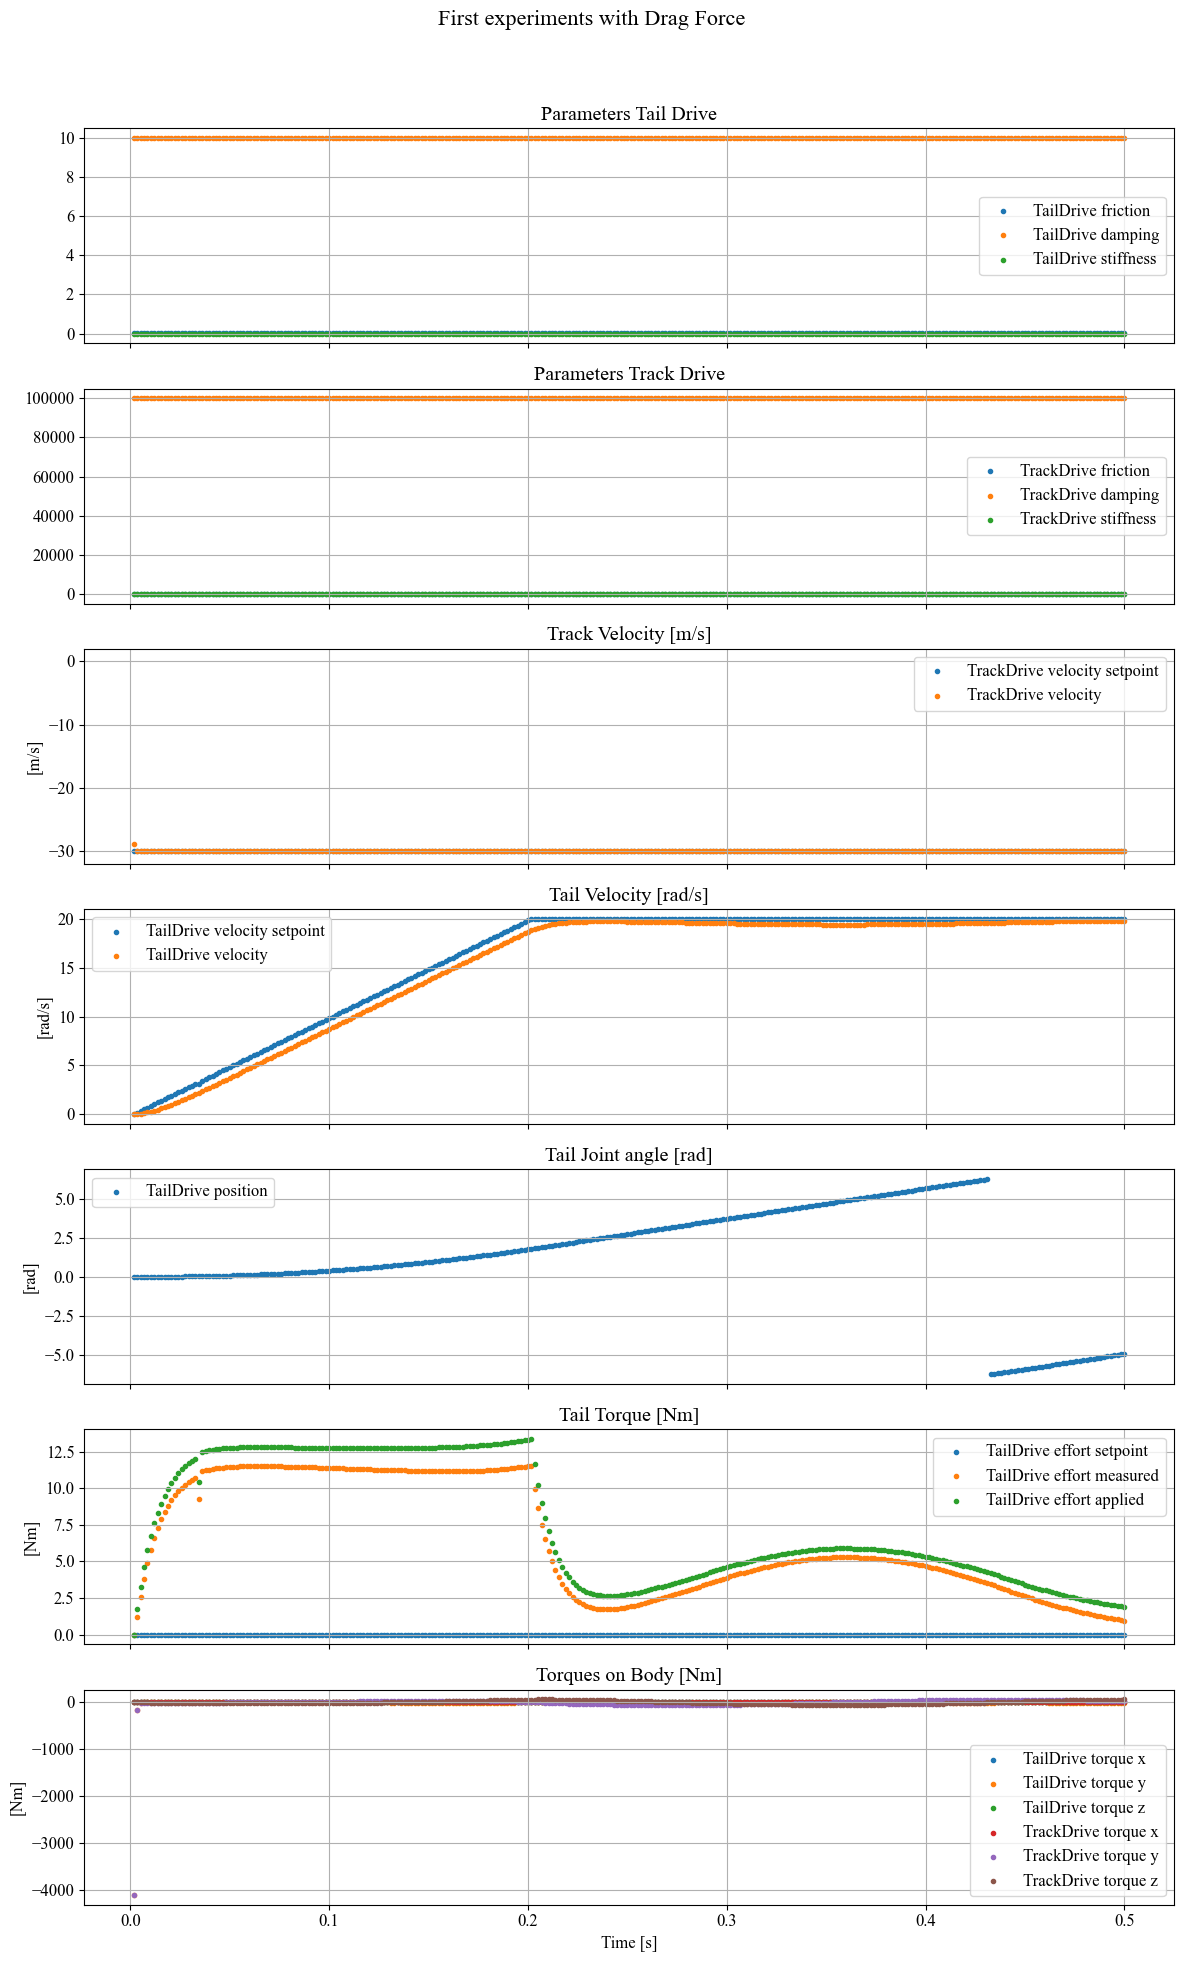

3.62396240234375e-05


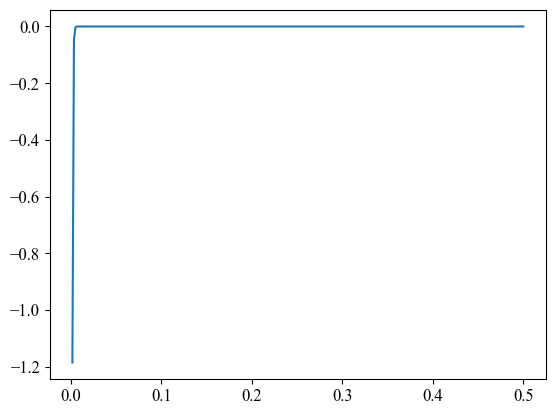

In [26]:
df_ff = pd.read_csv('results/2024_10_06_FF_windsweep30_enabled.csv')
stuff_to_plot = {
    "Parameters Tail Drive": ["TailDrive_friction", "TailDrive_damping", "TailDrive_stiffness"],
    "Parameters Track Drive": ["TrackDrive_friction", "TrackDrive_damping", "TrackDrive_stiffness"],
    "Track Velocity [m/s]": ["TrackDrive_velocity_setpoint", "TrackDrive_velocity"],
    "Tail Velocity [rad/s]": ["TailDrive_velocity_setpoint", "TailDrive_velocity"],
    "Tail Joint angle [rad]": ["TailDrive_position"],
    "Tail Torque [Nm]": ["TailDrive_effort_setpoint", "TailDrive_effort_measured", "TailDrive_effort_applied"],
    "Torques on Body [Nm]": ["TailDrive_torque_x", "TailDrive_torque_y", "TailDrive_torque_z", "TrackDrive_torque_x", "TrackDrive_torque_y", "TrackDrive_torque_z"],
}
# print(df_ff.columns)
overview_plot(df_ff, stuff_to_plot, "First experiments with Drag Force")#, time_range=(0.01, 1))

plt.plot(df_ff['time_seconds'], df_ff['TrackDrive_velocity_setpoint'] - df_ff["TrackDrive_velocity"])
print((df_ff['TrackDrive_velocity_setpoint'][df_ff['time_seconds']>0.01] - df_ff['TrackDrive_velocity'][df_ff['time_seconds']>0.01]).abs().max())

## Analytical Approach

Index(['time_seconds', 'F_sub_x', 'F_sub_y', 'F_sub_z', 'F_total',
       'F_applied?', 'A_tilde', 'Wind_x', 'Wind_y', 'Wind_z',
       'TailDrive_friction', 'TailDrive_damping', 'TailDrive_stiffness',
       'TailDrive_position_setpoint', 'TailDrive_velocity_setpoint',
       'TailDrive_effort_setpoint', 'TailDrive_effort_measured',
       'TailDrive_effort_applied', 'TailDrive_position', 'TailDrive_velocity',
       'Root_Body_position_x', 'Root_Body_position_y', 'Root_Body_position_z',
       'Root_Body_velocity_x', 'Root_Body_velocity_y', 'Root_Body_velocity_z',
       'Root_Body_acceleration_x', 'Root_Body_acceleration_y',
       'Root_Body_acceleration_z', 'Root_Body_angular_velocity_x',
       'Root_Body_angular_velocity_y', 'Root_Body_angular_velocity_z',
       'Root_Body_angular_acceleration_x', 'Root_Body_angular_acceleration_y',
       'Root_Body_angular_acceleration_z', 'Body_position_x',
       'Body_position_y', 'Body_position_z', 'Body_velocity_x',
       'Body_velocity

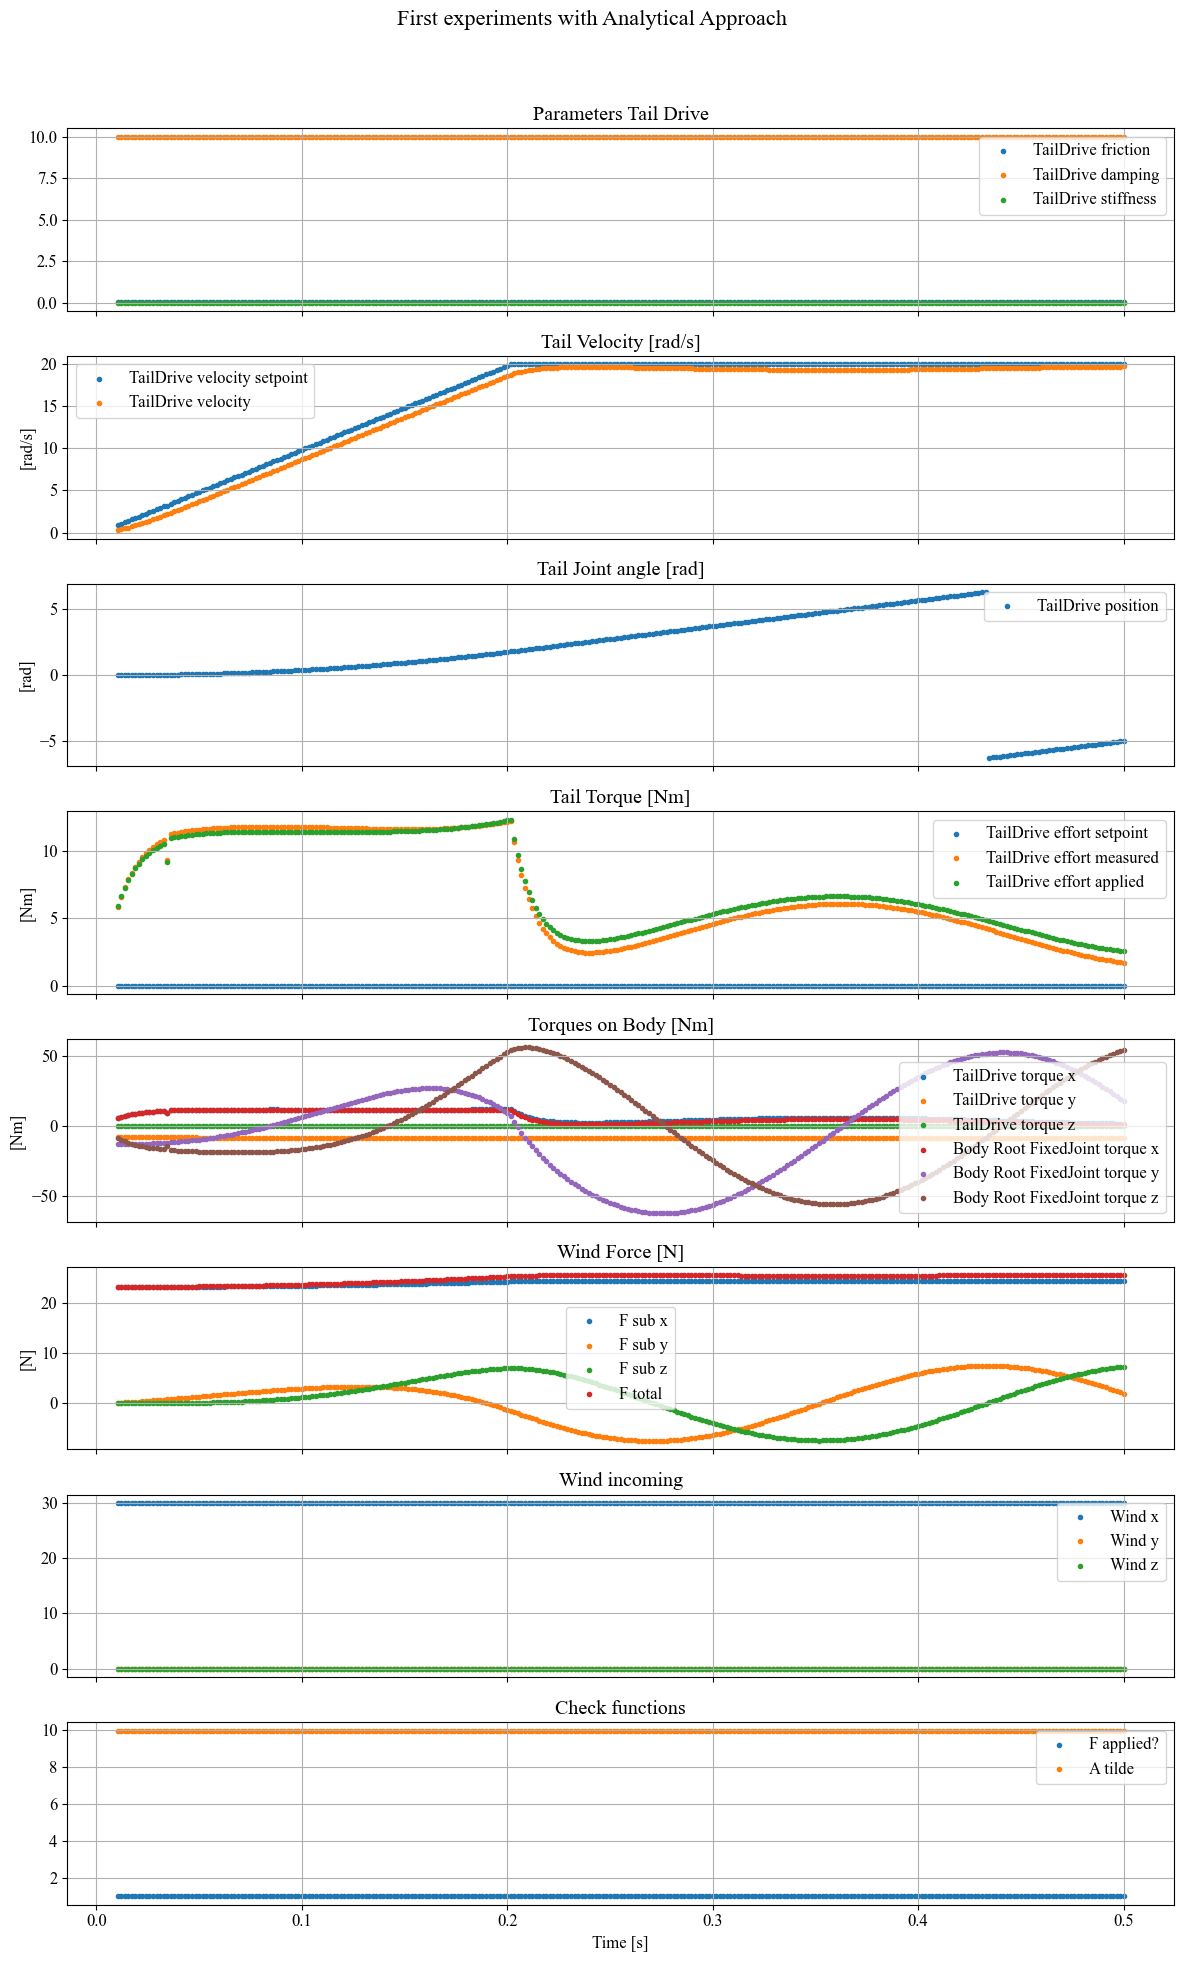

In [27]:
## Analytical Approach
df_an = pd.read_csv('results/DUMMY_AN_enabled.csv')
stuff_to_plot = {
    "Parameters Tail Drive": ["TailDrive_friction", "TailDrive_damping", "TailDrive_stiffness"],
    "Tail Velocity [rad/s]": ["TailDrive_velocity_setpoint", "TailDrive_velocity"],
    "Tail Joint angle [rad]": ["TailDrive_position"],
    "Tail Torque [Nm]": ["TailDrive_effort_setpoint", "TailDrive_effort_measured", "TailDrive_effort_applied"],
    "Torques on Body [Nm]": ["TailDrive_torque_x", "TailDrive_torque_y", "TailDrive_torque_z", "Body_Root_FixedJoint_torque_x", "Body_Root_FixedJoint_torque_y", "Body_Root_FixedJoint_torque_z"],
    "Wind Force [N]": ["F_sub_x", "F_sub_y", "F_sub_z", "F_total"],
    "Wind incoming": ["Wind_x", "Wind_y", "Wind_z"],
    "Check functions": ["F_applied?", "A_tilde"],
}
print(df_an.columns)
overview_plot(df_an, stuff_to_plot, "First experiments with Analytical Approach", time_range=(0.01, 1))

# Analytical

In [28]:
def some_math_function(df1_wind, df2_noWind):
    column = "Body_Root_FixedJoint_torque_x"
    difference = pd.DataFrame(index=df1_wind.index, data={'time_seconds': df1_wind['time_seconds'], 'with_wind': df1_wind[column], 'without_wind': df2_noWind[column]})
    difference['wind_minus_noWind'] = df1_wind[column] - df2_noWind[column]
    difference['time_seconds'] = df1_wind['time_seconds'].copy()

    # Stats on difference
    print(f"Mean difference: {difference['wind_minus_noWind'].mean()}")
    print(f"Max difference: {difference['wind_minus_noWind'].max()}")
    print(f"Min difference: {difference['wind_minus_noWind'].min()}")

    # Percentage difference where max difference
    # Index where max difference occurs (drop index=125, because autlier!)
    difference = difference.drop(index=125)
    difference = difference.drop(index=228)
    idx = difference['wind_minus_noWind'].idxmax()
    print(f"At max difference (time_seconds={difference['time_seconds'][idx]}), the percentage difference is: {difference['wind_minus_noWind'][idx] / difference['without_wind'][idx] * 100}%")

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(difference['time_seconds'], difference['wind_minus_noWind'], label='Difference between with and without wind')
    ax.set_title('Difference between with and without wind')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Difference [Nm]')
    ax.legend()
    ax.grid()

C:\Users\Max\AppData\Local\Temp\ipykernel_15092\2338023371.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woForce[column].replace(0, float('nan'), inplace=True)


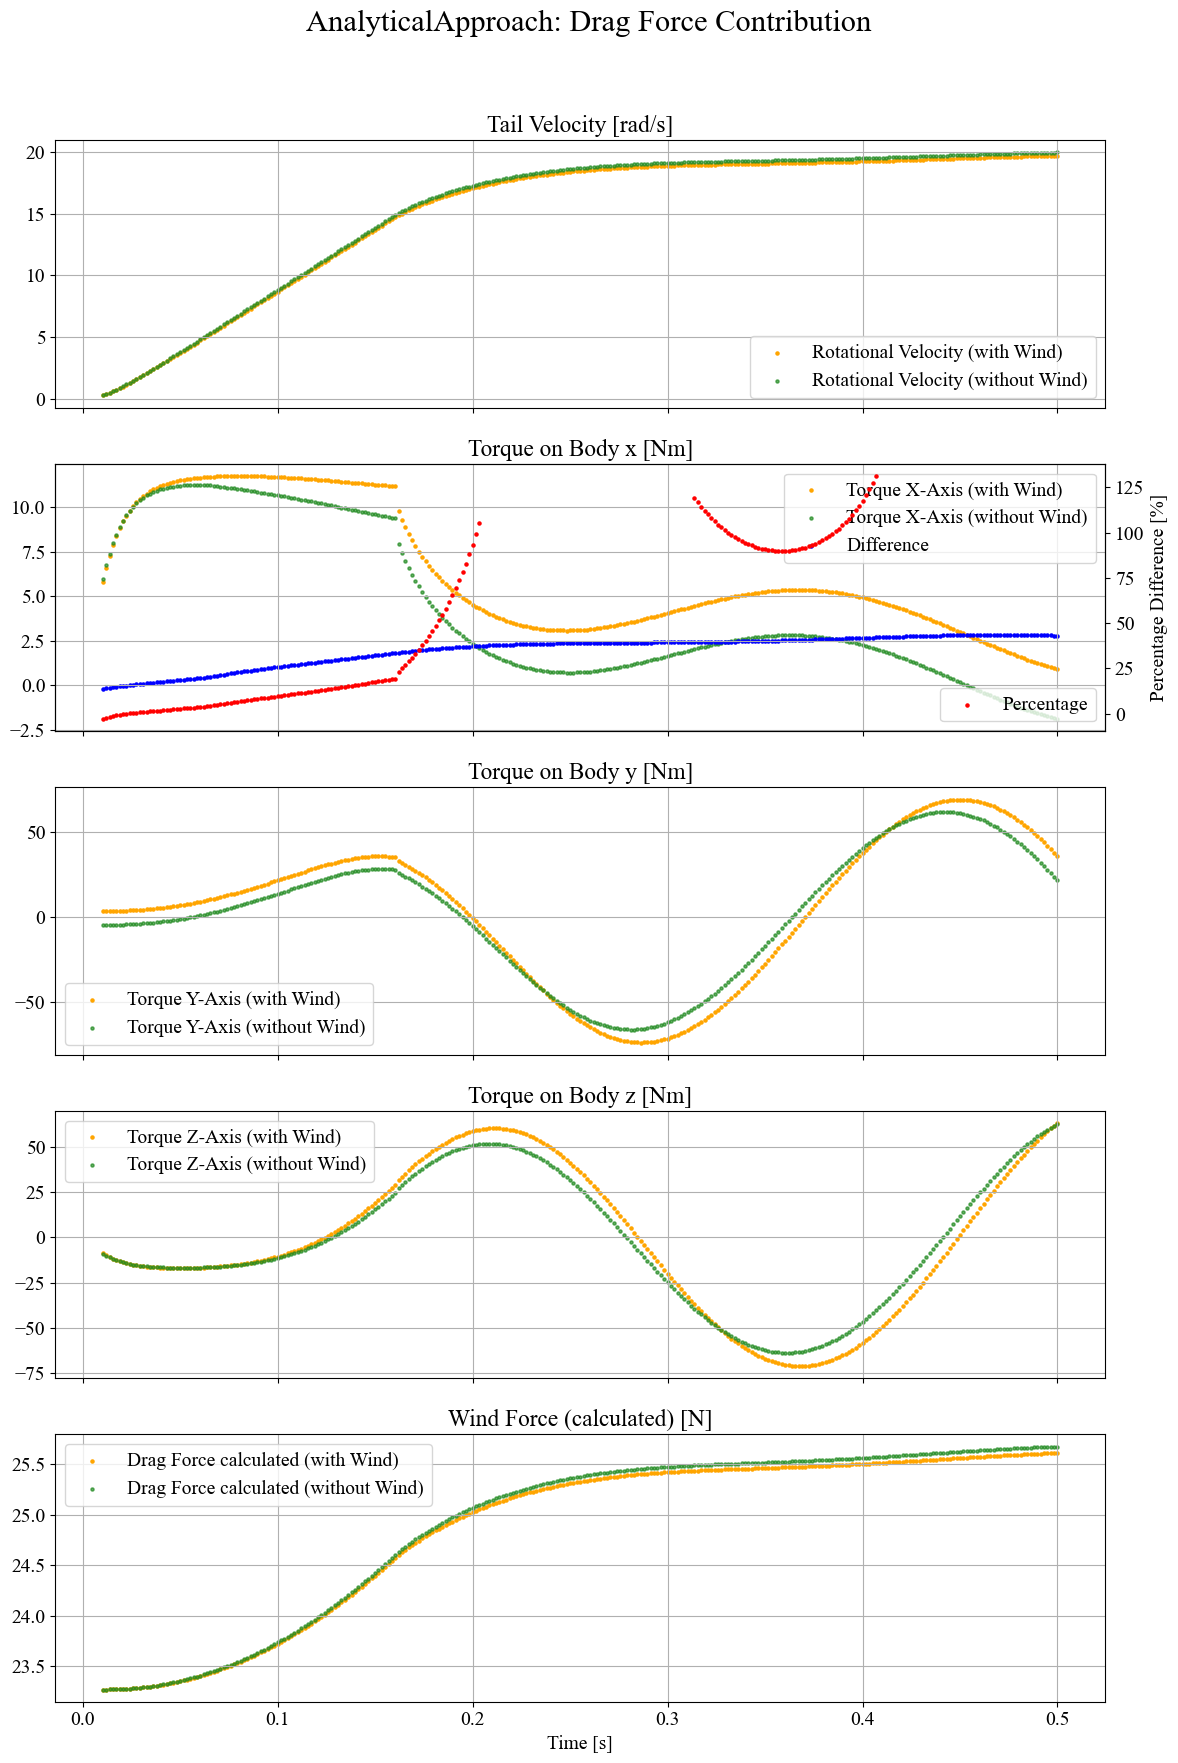

In [30]:
df_analytical_wForce = pd.read_csv('results/2024_10_06_An_enabled.csv')
df_analytical_woForce = pd.read_csv('results/2024_10_06_An_disabled.csv')

columns_to_plot = {"Tail Velocity [rad/s]": ["TailDrive_velocity"],
                    "Torque on Body x [Nm]": ["Body_Root_FixedJoint_torque_x"],
                    "Torque on Body y [Nm]": ["Body_Root_FixedJoint_torque_y"],
                    "Torque on Body z [Nm]": ["Body_Root_FixedJoint_torque_z"],
                    "Wind Force (calculated) [N]": ["F_total"]
}
legend = {
    "Tail Velocity [rad/s]": ["Rotational Velocity", "Rotational Velocity Setpoint"],
    "Torque on Body x [Nm]": ["Torque X-Axis"],
    "Torque on Body y [Nm]": ["Torque Y-Axis"],
    "Torque on Body z [Nm]": ["Torque Z-Axis"],
    "Wind Force (calculated) [N]": ["Drag Force calculated"]
}

additional_functions = {
    "Torque on Body x [Nm]": add_difference_and_percentage_line_to_plot,
    "Torque on Body x [Nm]_args": {"column": ["Body_Root_FixedJoint_torque_x"]}
}

plot_Drag_contribution(df_wForce=df_analytical_wForce, df_woForce=df_analytical_woForce, 
                       columns_to_plot=columns_to_plot,
                       legend=legend, suptitle="AnalyticalApproach: Drag Force Contribution",
                       additional_functions=additional_functions, time_range=(0.01, 1))
# some_math_function(df_analytical_wForce, df_analytical_woForce)

# Force Field Drag

In [31]:
df_FF_wForce = pd.read_csv('results/2024_10_06_FF_enabled.csv')
df_FF_woForce = pd.read_csv('results/2024_10_06_FF_disabled.csv')

# df_FF_wForce.columns

columns_to_plot = {"Tail Velocity [rad/s]": ["TailDrive_velocity"],
                    "Torque on Body x [Nm]": ["TrackDrive_torque_x"],
                    "Torque on Body y [Nm]": ["TrackDrive_torque_y"],
                    "Torque on Body z [Nm]": ["TrackDrive_torque_z"],
}
legend = {
    "Tail Velocity [rad/s]": ["Rotational Velocity", "Rotational Velocity Setpoint"],
    "Torque on Body x [Nm]": ["Torque X-Axis"],
    "Torque on Body y [Nm]": ["Torque Y-Axis"],
    "Torque on Body z [Nm]": ["Torque Z-Axis"],
}

additional_functions = {
    "Torque on Body x [Nm]": add_difference_and_percentage_line_to_plot,
    "Torque on Body x [Nm]_args": {"column": ["TrackDrive_torque_x"]}
}

plot_Drag_contribution(df_wForce=df_FF_wForce, df_woForce=df_FF_woForce, 
                       columns_to_plot=columns_to_plot,
                       legend=legend, suptitle="ForceFields Approach: Drag Force Contribution", 
                       additional_functions=additional_functions, time_range=(0.01, 1))
# some_math_function(df_FF_wForce, df_FF_woForce)

FileNotFoundError: [Errno 2] No such file or directory: 'results/2024_10_06_FF_enabled.csv'

# Final Plots

## Angular Velocity profile

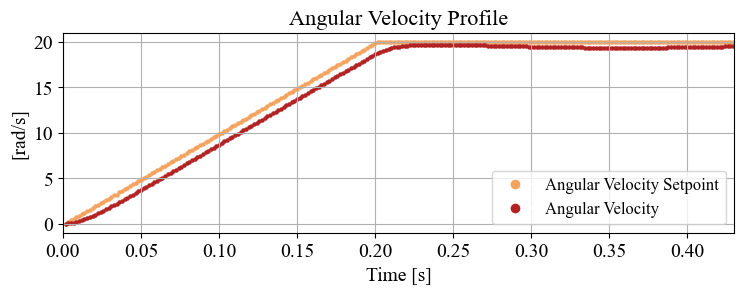

In [32]:
data = pd.read_csv('results/2024_10_06_An_corner_enabled.csv')

fig, ax = plt.subplots(figsize=(10, 4))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

ax.scatter(data['time_seconds'], data['TailDrive_velocity_setpoint'], label='Angular Velocity Setpoint', marker='o', s=5, color='sandybrown')
ax.scatter(data['time_seconds'], data['TailDrive_velocity'], label='Angular Velocity', marker='o', s=5, color='firebrick')

ax.set_xlim(0, 0.43)
ax.set_title('Angular Velocity Profile', fontsize=16)
ax.set_xlabel('Time [s]')
ax.set_ylabel('[rad/s]')
ax.grid()

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Angular Velocity Setpoint', markerfacecolor='sandybrown', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Angular Velocity', markerfacecolor='firebrick', markersize=8),
    # Line2D([0], [0], marker='o', color='w', label='Tail Position', markerfacecolor='olive', markersize=8)
]

# One unified legend
ax.legend(handles=legend_elements, loc='lower right')

width_cm = 22
width_inch = width_cm / 2.54
fig.set_size_inches(width_inch, width_inch*0.3)

plt.savefig('results/AngularVelocityProfile.pdf', format='pdf', bbox_inches='tight')


## Analytical vs FF


Metric: Absolute Maximum Difference
                An with aero An without aero FF with aero FF without aero
An with aero             NaN        0.265741     0.079615        0.265726
An without aero     0.265741             NaN      0.19071        0.000021
FF with aero        0.079615         0.19071          NaN        0.190695
FF without aero     0.265726        0.000021     0.190695             NaN

Metric: Mean Difference
                An with aero An without aero FF with aero FF without aero
An with aero             NaN       -0.196496    -0.054832       -0.196486
An without aero     0.196496             NaN     0.141664        0.000009
FF with aero        0.054832       -0.141664          NaN       -0.141655
FF without aero     0.196486       -0.000009     0.141655             NaN

Metric: Standard Deviation
                An with aero An without aero FF with aero FF without aero
An with aero             NaN        0.073835     0.021713        0.073832
An without aero     0.

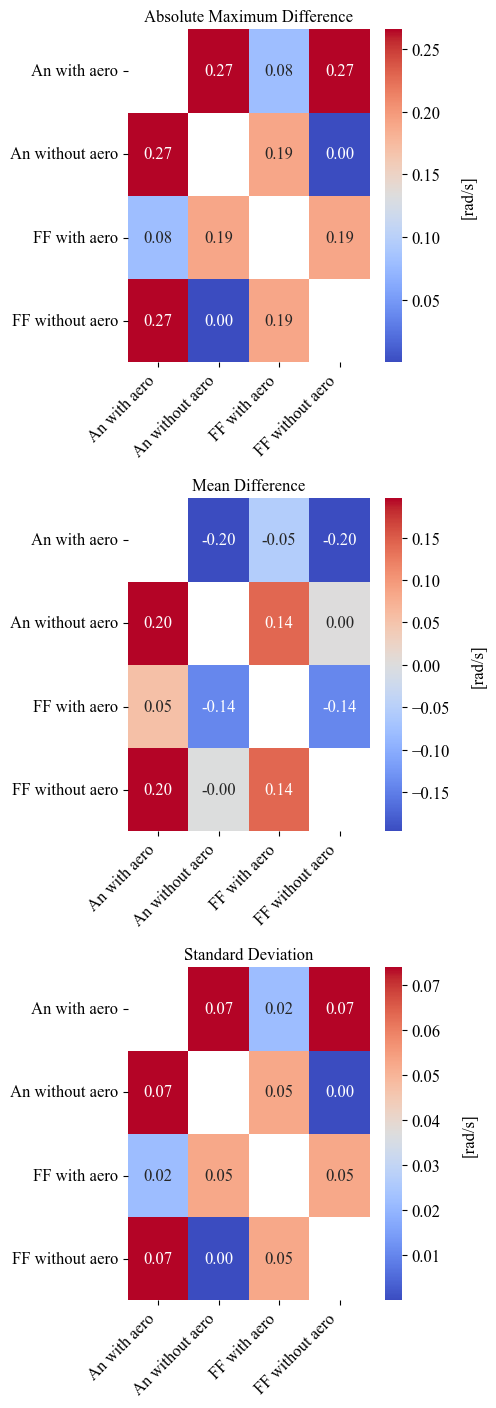

Analytical approach: Abs(Max difference): 0.26574134826660156, Mean difference: -0.19649581520593373, Std: 0.07383538008204944
ForceFields approach: Abs(Max difference): 0.19069480895996094, Mean difference: -0.14165462107108567, Std: 0.05252273583960172
Abs(Max Difference) between An&FF with wind: 0.07961463928222301, Mean difference: 0.0548317658040545, Std: 0.02171275082131379
Abs(Max Difference) between An&FF without wind: 2.0980834964490214e-05, Mean difference: -9.42833079355696e-06, Std: 5.0998415699743515e-06
--- Analytical Approach ---
Angular impulse until 0.2 seconds: 2.1194423790635772
Angular impulse without wind until 0.2 seconds: 1.9219247030800821
Difference: 0.19751767598349512, in percentage: 10.277076706852913%
--- ForceFields Approach ---
Angular impulse until 0.2 seconds: 2.0598107812733524
Angular impulse without wind until 0.2 seconds: 1.9219251164074636
Difference: 0.13788566486588882, in percentage: 7.174351575342853%


(np.float64(2.0598107812733524),
 np.float64(1.9219251164074636),
 np.float64(0.13788566486588882),
 np.float64(7.174351575342853))

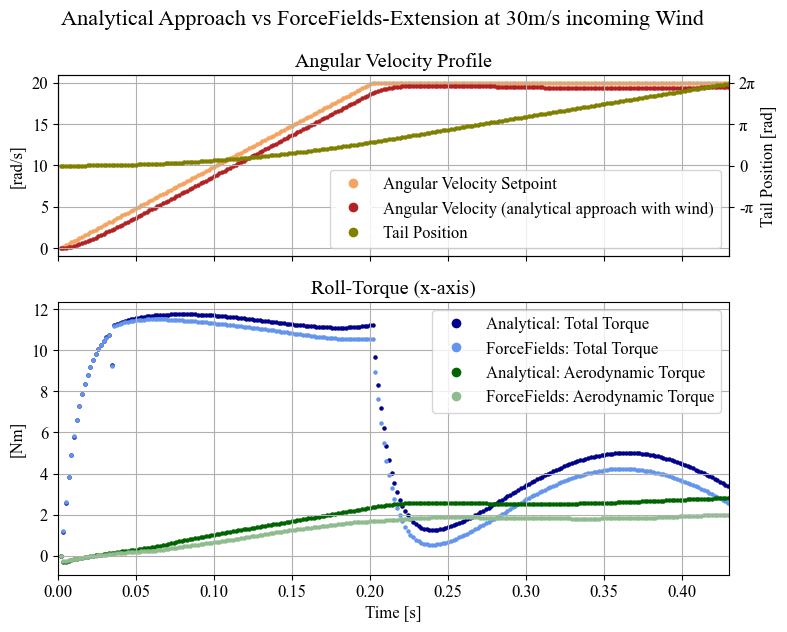

In [33]:
#### These values used damping = 5, that makes total angular impulse smaller as control is not followed as closely
# an_w_Wind = pd.read_csv('results/2024_10_07_An_enabled.csv')
# an_no_Wind = pd.read_csv('results/2024_10_07_An_disabled.csv')

# ff_w_Wind = pd.read_csv('results/2024_10_07_FF_enabled.csv')
# ff_no_Wind = pd.read_csv('results/2024_10_07_FF_disabled.csv')
# --------------------------------------------------------------------

### OLD VALUES with d=10 ----------------------------------------------
an_w_Wind = pd.read_csv('results/2024_10_06_An_corner_enabled.csv')
an_no_Wind = pd.read_csv('results/2024_10_06_An_corner_disabled.csv')

ff_w_Wind = pd.read_csv('results/2024_10_06_FF_corner_enabled.csv')
ff_no_Wind = pd.read_csv('results/2024_10_06_FF_corner_disabled.csv')
# ff_w_Wind = pd.read_csv('results/2024_10_06_FF_windsweep30_enabled.csv')
# ff_no_Wind = pd.read_csv('results/2024_10_06_FF_windsweep30_disabled.csv')
# ---------------------------------------------------------------------

# Compute metrics for the angular velocity difference
angular_velocities = {
    "An with aero": an_w_Wind["TailDrive_velocity"],
    "An without aero": an_no_Wind["TailDrive_velocity"],
    "FF with aero": ff_w_Wind["TailDrive_velocity"],
    "FF without aero": ff_no_Wind["TailDrive_velocity"]
}
metrics = {
    "Absolute Maximum Difference": lambda x: x.abs().max(),
    "Mean Difference": lambda x: x.mean(),
    "Standard Deviation": lambda x: x.std()
}
metrics_dict = compute_metrics(angular_velocities, metrics)
plot_metrics_heatmap(metrics_dict, save_path='results/AngularVelocity_Differences_An_vs_FF.pdf', save_format='pdf')

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10), height_ratios=[1,1.5,])
# Default font to Times New roman and fontsize to 12
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

## Velocity profile
# Check that velocit profiles are the same
vel_setpoint1 = ff_w_Wind['TailDrive_velocity_setpoint'] - an_w_Wind['TailDrive_velocity_setpoint']
assert vel_setpoint1.max() < 0.01, f"Velocity setpoints are not the same, max difference: {vel_setpoint1.max()}"
vel_setpoint2 = ff_no_Wind['TailDrive_velocity_setpoint'] - an_no_Wind['TailDrive_velocity_setpoint']
assert vel_setpoint2.max() < 0.01, "Velocity setpoints are not the same"

assert (ff_w_Wind['TailDrive_velocity'] - ff_no_Wind['TailDrive_velocity']).abs().max() < 0.3, "Velocity profiles are not similar enough, adjust threshold or inspect!"
assert (an_w_Wind['TailDrive_velocity'] - an_no_Wind['TailDrive_velocity']).abs().max() < 0.3, "Velocity profiles are not similar enough, adjust threshold or inspect!"

an_angvel_diff = an_w_Wind['TailDrive_velocity'] - an_no_Wind['TailDrive_velocity']
ff_angvel_diff = ff_w_Wind['TailDrive_velocity'] - ff_no_Wind['TailDrive_velocity']
print(f"Analytical approach: Abs(Max difference): {an_angvel_diff.abs().max()}, Mean difference: {an_angvel_diff.mean()}, Std: {an_angvel_diff.std()}")
print(f"ForceFields approach: Abs(Max difference): {ff_angvel_diff.abs().max()}, Mean difference: {ff_angvel_diff.mean()}, Std: {ff_angvel_diff.std()}")

an_ff_w_Wind_angvel_diff = ff_w_Wind["TailDrive_velocity"] - an_w_Wind["TailDrive_velocity"]
an_ff_no_Wind_angvel_diff = ff_no_Wind["TailDrive_velocity"] - an_no_Wind["TailDrive_velocity"]
print(f"Abs(Max Difference) between An&FF with wind: {an_ff_w_Wind_angvel_diff.abs().max()}, Mean difference: {an_ff_w_Wind_angvel_diff.mean()}, Std: {an_ff_w_Wind_angvel_diff.std()}")
print(f"Abs(Max Difference) between An&FF without wind: {an_ff_no_Wind_angvel_diff.abs().max()}, Mean difference: {an_ff_no_Wind_angvel_diff.mean()}, Std: {an_ff_no_Wind_angvel_diff.std()}")

# Limit x-axis
ax1.set_xlim(0, 0.43)

### Plot #1: Angular Velocity Profile
# Setpoint
ax1.scatter(an_w_Wind['time_seconds'], an_w_Wind['TailDrive_velocity_setpoint'], label='Angular Velocity Setpoint', marker='o', s=5, color='sandybrown')
# Measured (Analytical Approach with wind)
ax1.scatter(an_w_Wind['time_seconds'], an_w_Wind['TailDrive_velocity'], label='Angular Velocity (analytical approach with wind)', marker='o', s=5, color='firebrick')
ax1.set_title('Angular Velocity Profile')
ax1.set_ylabel('[rad/s]')
ax1.grid()
# ax1.legend()

# Add another axis on the right hand side for tail position
ax1_right = ax1.twinx()
ax1_right.scatter(an_w_Wind['time_seconds'], an_w_Wind['TailDrive_position'], label='Tail Position', marker='o', s=5, color='olive')
# ax1_right should be in steps of pi
ax1_right.set_yticks(np.arange(-np.pi, 3*np.pi, np.pi))
ax1_right.set_yticklabels(['-π', '0', 'π', '2π'])
ax1_right.set_ylabel('Tail Position [rad]')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Angular Velocity Setpoint', markerfacecolor='sandybrown', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Angular Velocity (analytical approach with wind)', markerfacecolor='firebrick', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Tail Position', markerfacecolor='olive', markersize=8)
]

# One unified legend
ax1.legend(handles=legend_elements, loc='lower right')

# # One unified legend
# handles, labels = ax1.get_legend_handles_labels()
# handles_right, labels_right = ax1_right.get_legend_handles_labels()
# ax1.legend(handles + handles_right, labels + labels_right, loc='lower right')



### Plot #2: Roll-Torque Analytical Approach
analytical = pd.DataFrame(index=an_w_Wind.index, data={'time_seconds': an_w_Wind['time_seconds'], 
                                                       'with_wind': an_w_Wind['Body_Root_FixedJoint_torque_x'], 
                                                       'without_wind': an_no_Wind['Body_Root_FixedJoint_torque_x']})
analytical['aero_contribution'] = analytical['with_wind'] - analytical['without_wind']

forcefields = pd.DataFrame(index=ff_w_Wind.index, data={'time_seconds': ff_w_Wind['time_seconds'],
                                                        'with_wind': ff_w_Wind['TrackDrive_torque_x'],
                                                        'without_wind': ff_no_Wind['TrackDrive_torque_x']})
forcefields['aero_contribution'] = forcefields['with_wind'] - forcefields['without_wind']

# Total torque: inertia + aero
ax2.scatter(analytical['time_seconds'], analytical['with_wind'], label='Analytical: Total Torque', marker='o', s=5, color='darkblue')
ax2.scatter(forcefields['time_seconds'], forcefields['with_wind'], label='ForceFields: Total Torque', marker='o', s=5, color='cornflowerblue')

# Aerodynamic torque
ax2.scatter(analytical['time_seconds'], analytical['aero_contribution'], label='Analytical: Aerodynamic Torque', marker='o', s=5, color='darkgreen')
ax2.scatter(forcefields['time_seconds'], forcefields['aero_contribution'], label='ForceFields: Aerodynamic Torque', marker='o', s=5, color='darkseagreen')

ax2.set_title('Roll-Torque (x-axis)')
ax2.set_ylabel('[Nm]')
ax2.set_xlabel('Time [s]')
# ax2.axvline(0.20, color='red', linestyle='--', label='Limit Calculation')
ax2.grid()

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Analytical: Total Torque', markerfacecolor='darkblue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='ForceFields: Total Torque', markerfacecolor='cornflowerblue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Analytical: Aerodynamic Torque', markerfacecolor='darkgreen', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='ForceFields: Aerodynamic Torque', markerfacecolor='darkseagreen', markersize=8)
]
ax2.legend(handles=legend_elements, loc='upper right')
# ax2.legend()

fig.suptitle("Analytical Approach vs ForceFields-Extension at 30m/s incoming Wind", fontsize=16)
# fig.tight_layout(rect=[0, 0, 1, 0.96])
# forcefields["offset"] = forcefields["with_wind"] + (analytical["aero_contribution"] - forcefields["aero_contribution"])
# ax2.scatter(forcefields['time_seconds'], forcefields['offset'], label='Offset', marker='o', s=5, color='red')

# Save figure in specific cm size
width_cm = 22
width_inch = width_cm / 2.54
fig.set_size_inches(width_inch, width_inch*0.75)
fig.savefig('results/ComparisonAnalyticalForceFields.pdf', format='pdf')
fig.savefig('results/ComparisonAnalyticalForceFields.svg', format='svg')

# Angular Impulse Analytical Approach
# Limit calculation to time_seconds < 0.16
index = an_w_Wind['time_seconds'] < 0.20

def calculate_angular_impulse(df_wind: pd.DataFrame, df_no_wind: pd.DataFrame, torque_column_name: str, time_limit: float = np.inf):
    """
    Calculate the angular impulse for the given dataframes using the trapezoidal rule.
    
    Args:
    - df_wind (pd.DataFrame): DataFrame with wind data. Must contain 'time_seconds' and 'torque_x' columns.
    - df_no_wind (pd.DataFrame): DataFrame without wind data (e.g. only inertia). Must contain 'time_seconds' and 'torque_x' columns.
    - time_limit (float): The time limit for the calculation. Default is 0.16 seconds.
    
    Returns:
    - angular_impulse (float): Angular impulse with wind.
    - angular_impulse_without_wind (float): Angular impulse without wind.
    - difference (float): Difference between the angular impulses.
    - percentage_difference (float): Percentage difference between the angular impulses.
    """
    # Apply the index to filter the data
    index_wind = df_wind['time_seconds'] < time_limit
    index_no_wind = df_no_wind['time_seconds'] < time_limit
    
    filtered_time_wind = df_wind['time_seconds'][index_wind]
    filtered_torque_wind = df_wind[torque_column_name][index_wind]
    filtered_time_no_wind = df_no_wind['time_seconds'][index_no_wind]
    filtered_torque_no_wind = df_no_wind[torque_column_name][index_no_wind]
    
    # Calculate the angular impulse using the trapezoidal rule
    angular_impulse = np.trapezoid(filtered_torque_wind, x=filtered_time_wind)
    angular_impulse_without_wind = np.trapezoid(filtered_torque_no_wind, x=filtered_time_no_wind)
    
    # Calculate the difference and percentage difference
    difference = angular_impulse - angular_impulse_without_wind
    percentage_difference = 100 * difference / angular_impulse_without_wind

    # Print the results
    print(f"Angular impulse until {time_limit} seconds: {angular_impulse}")
    print(f"Angular impulse without wind until {time_limit} seconds: {angular_impulse_without_wind}")
    print(f"Difference: {difference}, in percentage: {percentage_difference}%")
    
    return angular_impulse, angular_impulse_without_wind, difference, percentage_difference

### Calculate Angular Impulse
print(f"--- Analytical Approach ---")
calculate_angular_impulse(an_w_Wind, an_no_Wind, 'Body_Root_FixedJoint_torque_x', time_limit=0.2)
print(f"--- ForceFields Approach ---")
calculate_angular_impulse(ff_w_Wind, ff_no_Wind, 'TrackDrive_torque_x', time_limit=0.2)


## Impulse over differing incoming velocities
Using only FF implementation.



2024_10_06_FF_windsweep00_enabled: min: 0.0, abs.max: 0.0
2024_10_06_FF_windsweep00_disabled: min: 0.0, abs.max: 0.0
2024_10_06_FF_windsweep02_enabled: min: -2.0, abs.max: 2.0
2024_10_06_FF_windsweep02_disabled: min: -2.0, abs.max: 2.0
2024_10_06_FF_windsweep05_enabled: min: -5.0, abs.max: 5.0
2024_10_06_FF_windsweep05_disabled: min: -5.0, abs.max: 5.0
2024_10_06_FF_windsweep10_enabled: min: -10.0, abs.max: 10.0
2024_10_06_FF_windsweep10_disabled: min: -10.0, abs.max: 10.0
2024_10_06_FF_windsweep15_enabled: min: -15.0, abs.max: 15.0
2024_10_06_FF_windsweep15_disabled: min: -15.0, abs.max: 15.0
2024_10_06_FF_windsweep30_enabled: min: -30.0, abs.max: 30.0
2024_10_06_FF_windsweep30_disabled: min: -30.0, abs.max: 30.0

Metric: Absolute Maximum Difference
                   0m/s with aero 0m/s without aero 2m/s with aero  \
0m/s with aero                NaN          0.041258       0.003553   
0m/s without aero        0.041258               NaN       0.042948   
2m/s with aero           0.00

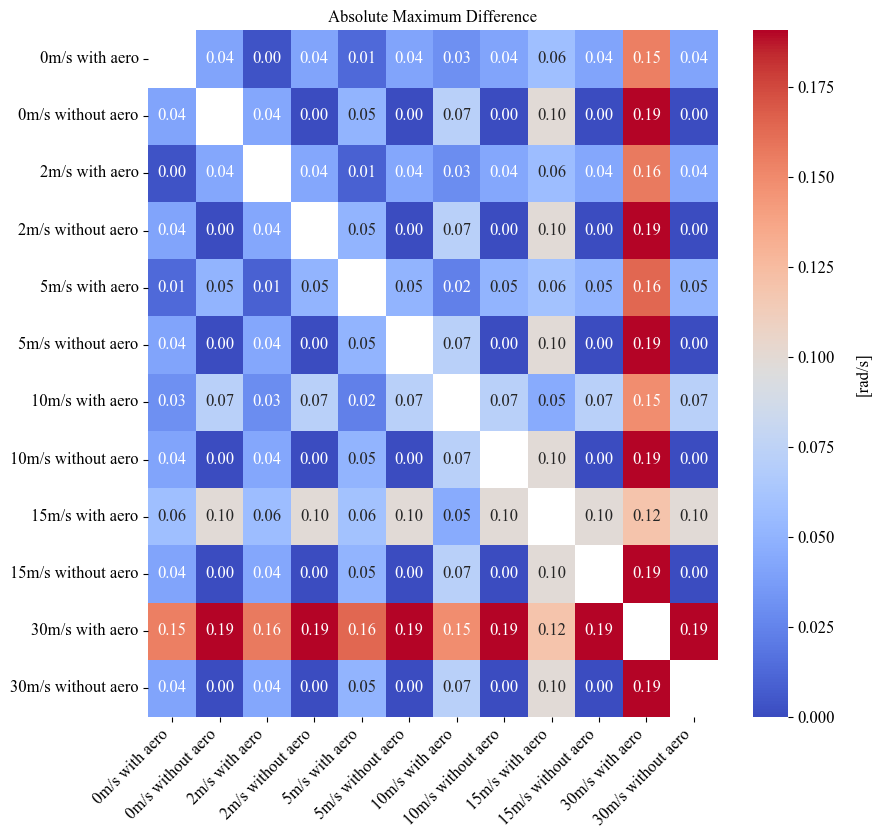

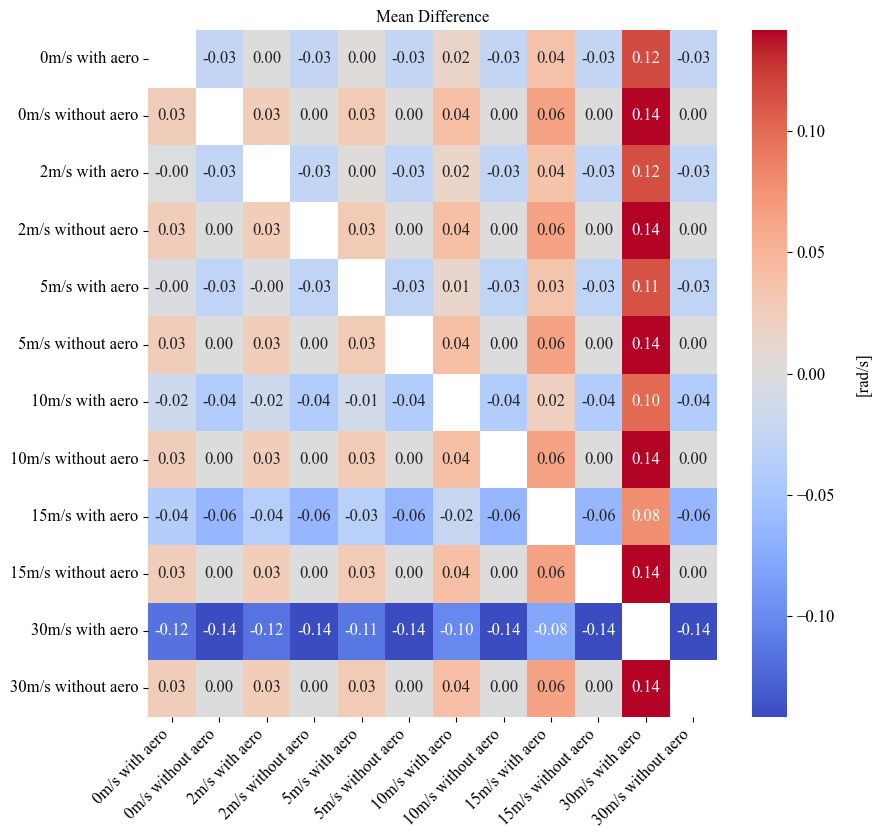

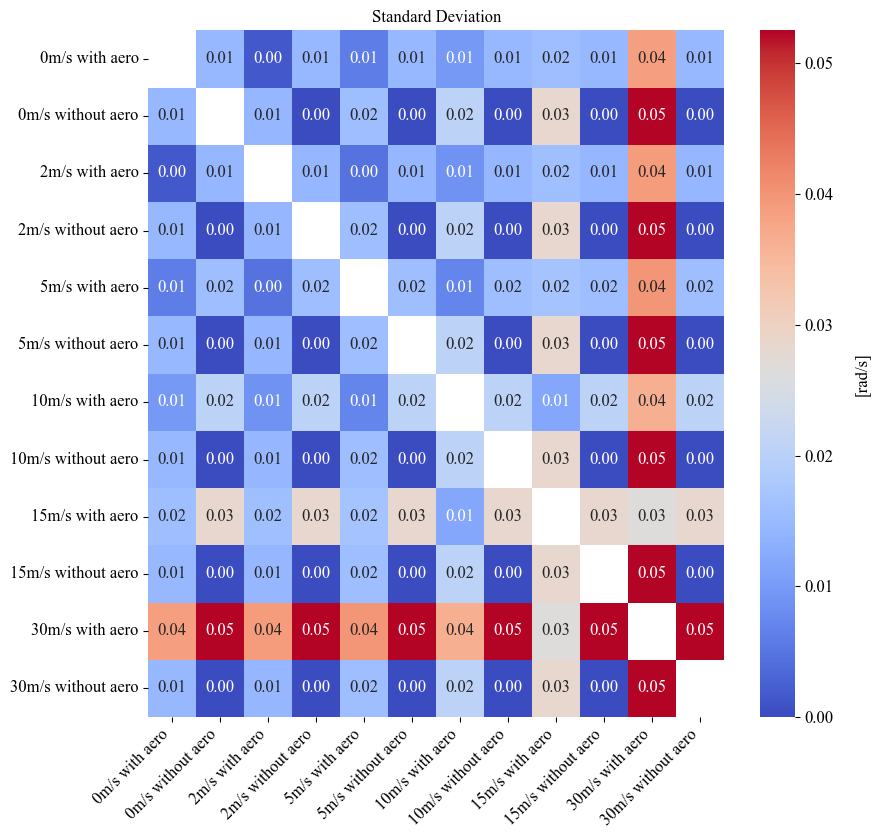

Angular impulse until 0.2 seconds: 1.9414587394944587
Angular impulse without wind until 0.2 seconds: 1.9219251164074636
Difference: 0.019533623086995133, in percentage: 1.0163571369267568%
Angular impulse until 0.2 seconds: 1.9438360791781888
Angular impulse without wind until 0.2 seconds: 1.9219251164074636
Difference: 0.02191096277072524, in percentage: 1.1400528867473283%
Angular impulse until 0.2 seconds: 1.952750676459283
Angular impulse without wind until 0.2 seconds: 1.9219251164074636
Difference: 0.030825560051819467, in percentage: 1.603889755571736%
Angular impulse until 0.2 seconds: 1.971753458319043
Angular impulse without wind until 0.2 seconds: 1.9219251164074636
Difference: 0.04982834191157948, in percentage: 2.592626605802443%
Angular impulse until 0.2 seconds: 1.9920234702784476
Angular impulse without wind until 0.2 seconds: 1.9219251164074636
Difference: 0.07009835387098406, in percentage: 3.647298912561932%
Angular impulse until 0.2 seconds: 2.0598107812733524
Angu

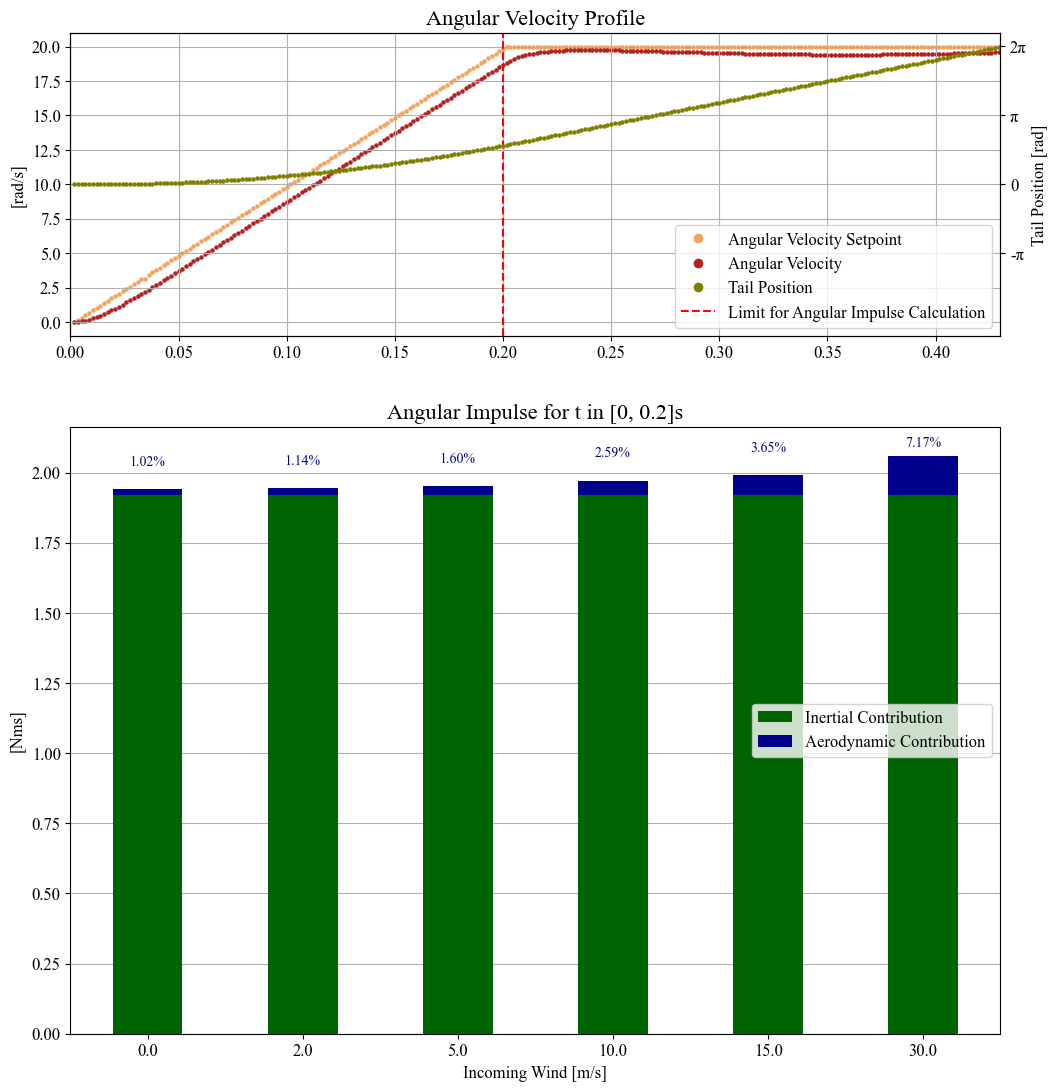

In [34]:
base_strings = ['2024_10_06_FF_windsweep00', '2024_10_06_FF_windsweep02', '2024_10_06_FF_windsweep05', '2024_10_06_FF_windsweep10',
                '2024_10_06_FF_windsweep15', '2024_10_06_FF_windsweep30']

# Load dataframes
dfs = {}
for name in base_strings:
    dfs[name + '_enabled'] = pd.read_csv(f'results/{name}_enabled.csv')
    dfs[name + '_disabled'] = pd.read_csv(f'results/{name}_disabled.csv')

def check_loaded_dataframes(dfs: dict):
    """
    This function contains a suite of tests to ensure the dataframes contain the data I am interested in.

    Checks include;
    1. For each dataframe df:
    - print the respective key from dfs and the values in the df: min: df['TrackDrive_velocity_setpoint'].min(), abs.max: df['TrackDrive_velocity_setpoint'].abs().max()
    - assert (df['TrackDrive_velocity_setpoint'] - df['TrackDrive_velocity']).abs().max() < 0.01, --> checks whether the setpoint is actually followed
    - ensure the tail velocity set point is according to my expectation, e.g. check that the TailDrive_velocity_setpoint is below 20 at 0.2s and at 20 after 0.2s.
        assert df['TailDrive_velocity_setpoint', df['time_seconds'] < 0.2].max() < 20
        assert df['TailDrive_velocity_setpoint', df['time_seconds'] > 0.2].min() > 20 - 0.01
    2. Add all velocity set points together, divide by number, subtract any arbitrary setpoint. If value is smaller than 0.01, the setpoints are (probably) all the same:
    - (sum_of_all(df['TailDrive_velocity_setpoint']) / number_of_dfs - df['TailDrive_velocity_setpoint']) < 0.01

    Args:
    - dfs (dict): dictionary with keys=df_names and values=dataframes
    Returns:
    - None
    """
    for key, df in dfs.items():
        ### Track Drive
        # Does the setpoint (e.g. max value) match with the dataframe-name?
        print(f"{key}: min: {df['TrackDrive_velocity_setpoint'].min()}, abs.max: {df['TrackDrive_velocity_setpoint'].abs().max()}")
        # Check that the setpoint is followed closely
        assert (df['TrackDrive_velocity_setpoint'][df['time_seconds']>0.01] - df['TrackDrive_velocity'][df['time_seconds']>0.01]).abs().max() < 0.2
       
        ### Tail Drive
        # Ensure the Tail Drive setpoint is linearly increasing and reaching 20rad/s after 0.2s
        assert df['TailDrive_velocity_setpoint'][df['time_seconds'] < 0.2].max() < 20
        assert df['TailDrive_velocity_setpoint'][df['time_seconds'] > 0.21].min() >= 20
        
    ### Tail Drive
    # Sum all TailDrive_velocity columns together and divide by the number of dataframes
    # Subtract the first dataframe from the result and check that the difference is smaller than 0.01
    # This check is probably accurate enough to ensure all velocities are the more or less the same
    sum_of_all = sum([df['TailDrive_velocity_setpoint'] for df in dfs.values()])
    number_of_dfs = len(dfs)
    assert (sum_of_all / number_of_dfs - df['TailDrive_velocity_setpoint']).abs().max() < 0.01



check_loaded_dataframes(dfs)

tail_velocities = {
    "0m/s with aero": dfs['2024_10_06_FF_windsweep00_enabled']['TailDrive_velocity'],
    "0m/s without aero": dfs['2024_10_06_FF_windsweep00_disabled']['TailDrive_velocity'],
    "2m/s with aero": dfs['2024_10_06_FF_windsweep02_enabled']['TailDrive_velocity'],
    "2m/s without aero": dfs['2024_10_06_FF_windsweep02_disabled']['TailDrive_velocity'],
    "5m/s with aero": dfs['2024_10_06_FF_windsweep05_enabled']['TailDrive_velocity'],
    "5m/s without aero": dfs['2024_10_06_FF_windsweep05_disabled']['TailDrive_velocity'],
    "10m/s with aero": dfs['2024_10_06_FF_windsweep10_enabled']['TailDrive_velocity'],
    "10m/s without aero": dfs['2024_10_06_FF_windsweep10_disabled']['TailDrive_velocity'],
    "15m/s with aero": dfs['2024_10_06_FF_windsweep15_enabled']['TailDrive_velocity'],
    "15m/s without aero": dfs['2024_10_06_FF_windsweep15_disabled']['TailDrive_velocity'],
    "30m/s with aero": dfs['2024_10_06_FF_windsweep30_enabled']['TailDrive_velocity'],
    "30m/s without aero": dfs['2024_10_06_FF_windsweep30_disabled']['TailDrive_velocity']
}

metrics = {
    "Absolute Maximum Difference": lambda x: x.abs().max(),
    "Mean Difference": lambda x: x.mean(),
    "Standard Deviation": lambda x: x.std()
}

metrics_dict = compute_metrics(tail_velocities, metrics)
plot_metrics_heatmap(metrics_dict, figure_size=9, save_path='results/AngularVelocity_Differences_AngImpulse.pdf', save_format='pdf', multiple_figs=True)


### Calculate Angular Impulse for each dataframe ###
plotting_dataframes = {}
for name in base_strings:
    name_with_Wind = name + '_enabled'
    name_no_Wind = name + '_disabled'
    (angular_impulse, 
     angular_impulse_without_wind, 
     difference, 
     percentage_difference) = calculate_angular_impulse(df_wind=dfs[name_with_Wind], 
                                                        df_no_wind=dfs[name_no_Wind], 
                                                        torque_column_name='TrackDrive_torque_x', 
                                                        time_limit=0.2)
    incoming_wind = dfs[name_with_Wind]['TrackDrive_velocity_setpoint'].abs().max()
    df = pd.DataFrame(data={'Incoming Wind [m/s]': [incoming_wind],
                            'Total Angular Impulse': [angular_impulse],
                            'Angular Impulse Inertia': [angular_impulse_without_wind],
                            'Difference': [difference],
                            'Percentage Difference': [percentage_difference]})
    plotting_dataframes[name] = df


### Create figure and axes ###
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(12, 13), height_ratios=[1, 2])
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

### Velocity profile
# Setpoint
df_ff_w_Wind = dfs['2024_10_06_FF_windsweep30_enabled']
# df_ff_w_Wind = df_ff_w_Wind[df_ff_w_Wind['time_seconds'] < 0.43]
ax1.scatter(df_ff_w_Wind['time_seconds'], df_ff_w_Wind['TailDrive_velocity_setpoint'], label='Angular Velocity Setpoint', marker='o', s=5, color='sandybrown')
# Measured (Analytical Approach with wind)
ax1.scatter(df_ff_w_Wind['time_seconds'], df_ff_w_Wind['TailDrive_velocity'], label='Angular Velocity', marker='o', s=5, color='firebrick')
ax1.set_title('Angular Velocity Profile', fontdict={'fontsize': 16})
ax1.set_ylabel('[rad/s]')
ax1.set_xlim(0, 0.43)
ax1.axvline(0.2, color='red', linestyle='--', label='Limit for Angular Impulse Calculation')
ax1.grid()
# ax1.legend()

# Add another axis on the right hand side for tail position
ax1_right = ax1.twinx()
ax1_right.scatter(df_ff_w_Wind['time_seconds'], df_ff_w_Wind['TailDrive_position'], label='Tail Position', marker='o', s=5, color='olive')
# ax1_right should be in steps of pi
ax1_right.set_yticks(np.arange(-np.pi, 3*np.pi, np.pi))
ax1_right.set_yticklabels(['-π', '0', 'π', '2π'])
ax1_right.set_ylabel('Tail Position [rad]')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Angular Velocity Setpoint', markerfacecolor='sandybrown', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Angular Velocity ', markerfacecolor='firebrick', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Tail Position', markerfacecolor='olive', markersize=8),
    Line2D([0], [0], color='red', linestyle='--', label='Limit for Angular Impulse Calculation')
]
ax1.legend(handles=legend_elements, loc='lower right')


### Plotting the dataframes ###
# fig, ax = plt.subplots(figsize=(12, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

# Prepare data for plotting
incoming_wind_speeds = []
total_angular_impulses = []
differences = []
percentage_differences = []

for name, df in plotting_dataframes.items():
    incoming_wind_speeds.append(df['Incoming Wind [m/s]'].values[0])
    total_angular_impulses.append(df['Total Angular Impulse'].values[0])
    differences.append(df['Difference'].values[0])
    percentage_differences.append(df['Percentage Difference'].values[0])

# Plotting
bar_width = 0.45
x_indices = np.arange(len(incoming_wind_speeds))

# Base for the blue bar (Inertia)
base_inertia = np.array(total_angular_impulses) - np.array(differences)

# Plot blue bars for the base (Inertia)
bars_inertia = ax2.bar(x_indices, base_inertia, width=bar_width, label='Inertia', color='darkgreen')

# Plot red bars for the stacked Difference (Aerodynamics) on top of Inertia
bars_difference = ax2.bar(x_indices, differences, width=bar_width, bottom=base_inertia, label='Aerodynamics', color='darkblue')

# Add text labels inside the blue bar for Percentage Difference
for i, bar in enumerate(bars_inertia):
    if i == len(percentage_differences) - 1:
        parametric_height = bars_difference[i].get_height() + bar.get_height() + 0.05
    else:
        parametric_height = bars_difference[i].get_height() + bar.get_height() + 0.1
    ax2.text(bar.get_x() + bar.get_width() / 2, parametric_height, f'{percentage_differences[i]:.2f}%', 
            ha='center', va='center', fontsize=10, color='darkblue')

# Customize plot
ax2.set_xlabel('Incoming Wind [m/s]')
ax2.set_ylabel('[Nms]')
ax2.set_title('Angular Impulse for t in [0, 0.2]s', fontdict={'fontsize': 16})
ax2.set_xticks(x_indices)
ax2.set_xticklabels([f'{wind:.1f}' for wind in incoming_wind_speeds])
# Grid: only horizontal lines
ax2.yaxis.grid(True)
ax2.set_axisbelow(True)
# Create a legend with the correct labels
ax2.legend(['Inertial Contribution', 'Aerodynamic Contribution'], loc='center right')

# plt.tight_layout()
plt.show()

# Save figure in specific cm size
width_cm = 22
width_inch = width_cm / 2.54
fig.set_size_inches(width_inch, width_inch)
fig.savefig('results/AngImpuls_over_Wind.pdf', format='pdf')
fig.savefig('results/AngImpuls_over_Wind.svg', format='svg')



## Dependency on acceleration rate a
This wasn't part of the project in the end due to time constraints

Max difference in angular velocity: 7.155763626098633
Angular Impulse Analytical Approach: 1.677912671812652
Angular Impulse Analytical Approach without Wind: 1.5617200351994638
Difference: 0.11619263661318824, in percentage: 7.440042644925667%


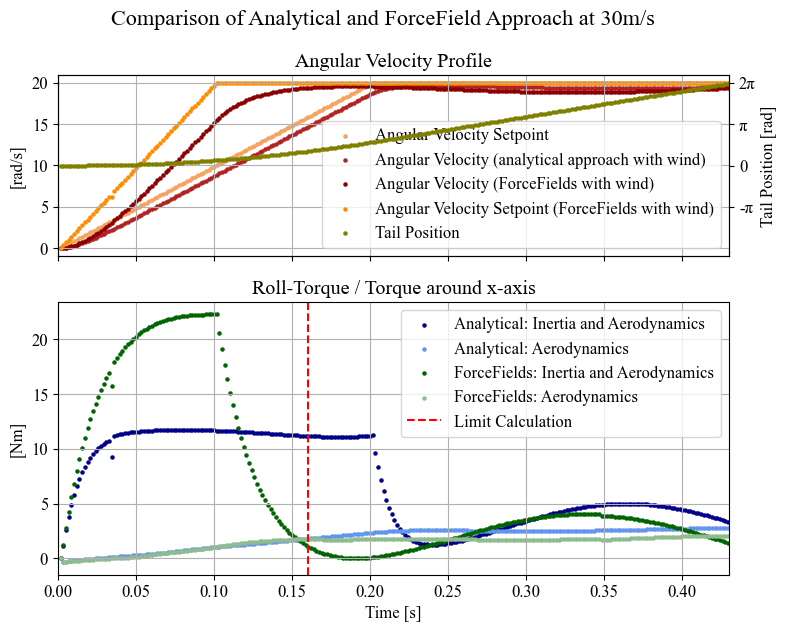

In [37]:
# aComp test:
# plot aerodynamic torque contribution for different a-values, given we accelerate until 20 rad/s
# calculate the angular (aero) impulse and see if it depends on a

an_w_Wind = pd.read_csv('results/2024_10_06_An_corner_enabled.csv')
an_no_Wind = pd.read_csv('results/2024_10_06_An_corner_disabled.csv')

ff_w_Wind = pd.read_csv('results/2024_10_06_FF_corner_a200_enabled.csv')
ff_no_Wind = pd.read_csv('results/2024_10_06_FF_corner_a200_disabled.csv')

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10), height_ratios=[1,1.5,])
# Default font to Times New roman and fontsize to 12
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

## Velocity profile
# Check that velocit profiles are the same
vel_setpoint1 = ff_w_Wind['TailDrive_velocity_setpoint'] - an_w_Wind['TailDrive_velocity_setpoint']
# assert vel_setpoint1.max() < 0.01, f"Velocity setpoints are not the same, max difference: {vel_setpoint1.max()}"
vel_setpoint2 = ff_no_Wind['TailDrive_velocity_setpoint'] - an_no_Wind['TailDrive_velocity_setpoint']
# assert vel_setpoint2.max() < 0.01, "Velocity setpoints are not the same"

with_wind_ang_vel_diff = ff_w_Wind["TailDrive_velocity"] - an_w_Wind["TailDrive_velocity"]
print(f"Max difference in angular velocity: {with_wind_ang_vel_diff.max()}")

# Limit x-axis
ax1.set_xlim(0, 0.43)

### Plot #1: Angular Velocity Profile
# Setpoint
ax1.scatter(an_w_Wind['time_seconds'], an_w_Wind['TailDrive_velocity_setpoint'], label='Angular Velocity Setpoint', marker='o', s=5, color='sandybrown')
# Measured (Analytical Approach with wind)
ax1.scatter(an_w_Wind['time_seconds'], an_w_Wind['TailDrive_velocity'], label='Angular Velocity (analytical approach with wind)', marker='o', s=5, color='firebrick')
ax1.scatter(ff_w_Wind['time_seconds'], ff_w_Wind['TailDrive_velocity'], label='Angular Velocity (ForceFields with wind)', marker='o', s=5, color='darkred')
ax1.scatter(ff_w_Wind['time_seconds'], ff_w_Wind['TailDrive_velocity_setpoint'], label='Angular Velocity Setpoint (ForceFields with wind)', marker='o', s=5, color='darkorange')
ax1.set_title('Angular Velocity Profile')
ax1.set_ylabel('[rad/s]')
ax1.grid()
# ax1.legend()

# Add another axis on the right hand side for tail position
ax1_right = ax1.twinx()
ax1_right.scatter(an_w_Wind['time_seconds'], an_w_Wind['TailDrive_position'], label='Tail Position', marker='o', s=5, color='olive')
# ax1_right should be in steps of pi
ax1_right.set_yticks(np.arange(-np.pi, 3*np.pi, np.pi))
ax1_right.set_yticklabels(['-π', '0', 'π', '2π'])
ax1_right.set_ylabel('Tail Position [rad]')

# One unified legend
handles, labels = ax1.get_legend_handles_labels()
handles_right, labels_right = ax1_right.get_legend_handles_labels()
ax1.legend(handles + handles_right, labels + labels_right, loc='lower right')



### Plot #2: Roll-Torque Analytical Approach
analytical = pd.DataFrame(index=an_w_Wind.index, data={'time_seconds': an_w_Wind['time_seconds'], 
                                                       'with_wind': an_w_Wind['Body_Root_FixedJoint_torque_x'], 
                                                       'without_wind': an_no_Wind['Body_Root_FixedJoint_torque_x']})
analytical['aero_contribution'] = analytical['with_wind'] - analytical['without_wind']

ax2.scatter(analytical['time_seconds'], analytical['with_wind'], label='Analytical: Inertia and Aerodynamics', marker='o', s=5, color='darkblue')
ax2.scatter(analytical['time_seconds'], analytical['aero_contribution'], label='Analytical: Aerodynamics', marker='o', s=5, color='cornflowerblue')
ax2.set_title('Roll-Torque Comparison')
ax2.set_ylabel('[Nm]')
# ax2.grid()
# ax2.legend()

### Plot #3: Roll-Torque ForceFields Approach
forcefields = pd.DataFrame(index=ff_w_Wind.index, data={'time_seconds': ff_w_Wind['time_seconds'],
                                                        'with_wind': ff_w_Wind['TrackDrive_torque_x'],
                                                        'without_wind': ff_no_Wind['TrackDrive_torque_x']})
forcefields['aero_contribution'] = forcefields['with_wind'] - forcefields['without_wind']

ax2.scatter(forcefields['time_seconds'], forcefields['with_wind'], label='ForceFields: Inertia and Aerodynamics', marker='o', s=5, color='darkgreen')
ax2.scatter(forcefields['time_seconds'], forcefields['aero_contribution'], label='ForceFields: Aerodynamics', marker='o', s=5, color='darkseagreen')
ax2.set_title('Roll-Torque / Torque around x-axis')
ax2.set_ylabel('[Nm]')
ax2.set_xlabel('Time [s]')
ax2.axvline(0.16, color='red', linestyle='--', label='Limit Calculation')
ax2.grid()
ax2.legend()

fig.suptitle("Comparison of Analytical and ForceField Approach at 30m/s", fontsize=16)
# fig.tight_layout(rect=[0, 0, 1, 0.96])
# forcefields["offset"] = forcefields["with_wind"] + (analytical["aero_contribution"] - forcefields["aero_contribution"])
# ax2.scatter(forcefields['time_seconds'], forcefields['offset'], label='Offset', marker='o', s=5, color='red')

# Save figure in specific cm size
width_cm = 22
width_inch = width_cm / 2.54
fig.set_size_inches(width_inch, width_inch*0.75)
# fig.savefig('results/ComparisonAnalyticalForceFields.pdf', format='pdf')

# Angular Impulse Analytical Approach
# Limit calculation to time_seconds < 0.16
index = an_w_Wind['time_seconds'] < 0.16

# Apply the index to filter the data
filtered_time_wind = an_w_Wind['time_seconds'][index]
filtered_torque_wind = an_w_Wind['Body_Root_FixedJoint_torque_x'][index]
filtered_time_no_wind = an_no_Wind['time_seconds'][index]
filtered_torque_no_wind = an_no_Wind['Body_Root_FixedJoint_torque_x'][index]

# Calculate the angular impulse using the trapezoidal rule
angular_impulse = np.trapezoid(filtered_torque_wind, x=filtered_time_wind)
angular_impulse_without_wind = np.trapezoid(filtered_torque_no_wind, x=filtered_time_no_wind)

print(f"Angular Impulse Analytical Approach: {angular_impulse}")
print(f"Angular Impulse Analytical Approach without Wind: {angular_impulse_without_wind}")
print(f"Difference: {angular_impulse - angular_impulse_without_wind}, in percentage: {100 * (angular_impulse - angular_impulse_without_wind) / angular_impulse_without_wind}%")
